1. Objective :

This analysis aims to identify crime patterns across victim demographics, time periods, and crime domains to support data-driven decision-making for crime prevention and case resolution strategies.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Dataset Overview :

- Records represent reported crime incidents
- Each row corresponds to one reported case
- Key dimensions include victim demographics, crime type, time of occurrence, and case status


In [58]:
df = pd.read_excel('crime_dataset_india.xlsx')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16.0,M,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37.0,M,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48.0,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49.0,F,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30.0,F,NaN,NaN,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,NaN,78.0,F,Firearm,NaN,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75.0,F,NaN,NaN,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,NaN,M,NaN,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11.0,M,Blunt Object,Violent Crime,1.0,No


3. Data Understanding :

In [59]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16.0,M,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37.0,M,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48.0,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49.0,F,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30.0,F,NaN,NaN,18.0,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Report Number      40160 non-null  int64         
 1   Date Reported      40160 non-null  datetime64[ns]
 2   City               40160 non-null  object        
 3   Crime Code         40160 non-null  int64         
 4   Crime Description  40099 non-null  object        
 5   Victim Age         40112 non-null  float64       
 6   Victim Gender      35828 non-null  object        
 7   Weapon Used        28694 non-null  object        
 8   Crime Domain       17212 non-null  object        
 9   Police Deployed    40104 non-null  float64       
 10  Case Closed        40160 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 3.4+ MB


In [61]:
df.describe()

,Report Number,Date Reported,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160,40160.000000,40112.000000,40104.000000
mean,20080.500000,2022-04-18 03:29:56.952191232,349.360259,44.490726,10.009051
min,1.000000,2020-01-01 05:00:00,100.000000,10.000000,1.000000
25%,10040.750000,2021-02-24 02:00:00,225.000000,27.000000,5.000000
50%,20080.500000,2022-04-18 05:00:00,349.000000,44.000000,10.000000
75%,30120.250000,2023-06-10 10:00:00,474.000000,62.000000,15.000000
max,40160.000000,2024-08-02 18:00:00,599.000000,79.000000,19.000000
std,11593.337742,NaN,144.169205,20.225056,5.470105


In [62]:
df.isna().sum()

Report Number            0
Date Reported            0
City                     0
Crime Code               0
Crime Description       61
Victim Age              48
Victim Gender         4332
Weapon Used          11466
Crime Domain         22948
Police Deployed         56
Case Closed              0
dtype: int64

4. Data Cleaning :

In [63]:
df['Victim Gender'] = df['Victim Gender'].replace({'M' : 'Male', 'F' : 'Female'})
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16.0,Male,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37.0,Male,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48.0,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49.0,Female,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30.0,Female,NaN,NaN,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,NaN,78.0,Female,Firearm,NaN,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75.0,Female,NaN,NaN,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,NaN,Male,NaN,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11.0,Male,Blunt Object,Violent Crime,1.0,No


In [64]:
df['Crime Description'] = df['Crime Description'].fillna('Unknown')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16.0,Male,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37.0,Male,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48.0,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49.0,Female,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30.0,Female,NaN,NaN,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78.0,Female,Firearm,NaN,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75.0,Female,NaN,NaN,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,NaN,Male,NaN,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11.0,Male,Blunt Object,Violent Crime,1.0,No


In [65]:
df['Victim Age'] = df['Victim Age'].fillna(df['Victim Age'].mean()).astype('int64')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,NaN,NaN,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,NaN,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,NaN,NaN,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,NaN,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1.0,No


In [66]:
df['Weapon Used'] = df['Weapon Used'].fillna('Unknown')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,NaN,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,NaN,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,NaN,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,NaN,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,NaN,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,NaN,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1.0,No


In [67]:
df['Crime Domain'] = df['Crime Domain'].fillna('Unknown')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13.0,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9.0,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15.0,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1.0,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12.0,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2.0,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6.0,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1.0,No


In [68]:
df['Police Deployed'] = df['Police Deployed'].fillna(df['Police Deployed'].mean()).astype('int64')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,No


In [69]:
df['Victim Gender'] = df['Victim Gender'].fillna('Unknown')
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,No
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,No
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,Yes
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,Yes
...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,No
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,Yes
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,No
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,No


In [70]:
df['Crime Month'] = df['Date Reported'].dt.month_name()
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Crime Month
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No,January
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,No,January
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,No,January
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,Yes,January
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,Yes,January
...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,No,August
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,Yes,July
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,No,August
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,No,August


In [71]:
df['Crime Year'] = df['Date Reported'].dt.year
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Crime Month,Crime Year
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No,January,2020
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,No,January,2020
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,No,January,2020
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,Yes,January,2020
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,Yes,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,No,August,2024
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,Yes,July,2024
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,No,August,2024
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,No,August,2024


In [72]:
df['Case Status'] = df['Case Closed'].replace({'No' : 'Pending', 'Yes' : 'Solved'})
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Crime Month,Crime Year,Case Status
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No,January,2020,Pending
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,No,January,2020,Pending
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,No,January,2020,Pending
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,Yes,January,2020,Solved
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,Yes,January,2020,Solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,No,August,2024,Pending
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,Yes,July,2024,Solved
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,No,August,2024,Pending
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,No,August,2024,Pending


In [73]:
df.drop(columns='Case Closed', inplace=True)

In [74]:
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Crime Month,Crime Year,Case Status
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,January,2020,Pending
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,January,2020,Pending
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,January,2020,Pending
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,January,2020,Solved
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,January,2020,Solved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,August,2024,Pending
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,July,2024,Solved
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,August,2024,Pending
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,August,2024,Pending


In [75]:
bins = [0,12,19,35,50,100]
labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['Age Group'] = pd.cut(df['Victim Age'], bins=bins, labels=labels, right=True)
df

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Crime Month,Crime Year,Case Status,Age Group
0,1,2020-01-02 00:00:00,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,January,2020,Pending,Teen
1,2,2020-01-01 19:00:00,Chennai,128,HOMICIDE,37,Male,Poison,Unknown,9,January,2020,Pending,Adult
2,3,2020-01-02 05:00:00,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Unknown,15,January,2020,Pending,Adult
3,4,2020-01-01 05:00:00,Pune,170,BURGLARY,49,Female,Firearm,Unknown,1,January,2020,Solved,Adult
4,5,2020-01-01 21:00:00,Pune,421,VANDALISM,30,Female,Unknown,Unknown,18,January,2020,Solved,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,Kolkata,312,Unknown,78,Female,Firearm,Unknown,12,August,2024,Pending,Senior
40156,40157,2024-07-31 14:00:00,Mumbai,300,ILLEGAL POSSESSION,75,Female,Unknown,Unknown,2,July,2024,Solved,Senior
40157,40158,2024-08-02 03:00:00,Kanpur,423,VEHICLE - STOLEN,44,Male,Unknown,Violent Crime,6,August,2024,Pending,Adult
40158,40159,2024-08-01 19:00:00,Patna,311,SEXUAL ASSAULT,11,Male,Blunt Object,Violent Crime,1,August,2024,Pending,Child


5. Plotting Diagrams : 

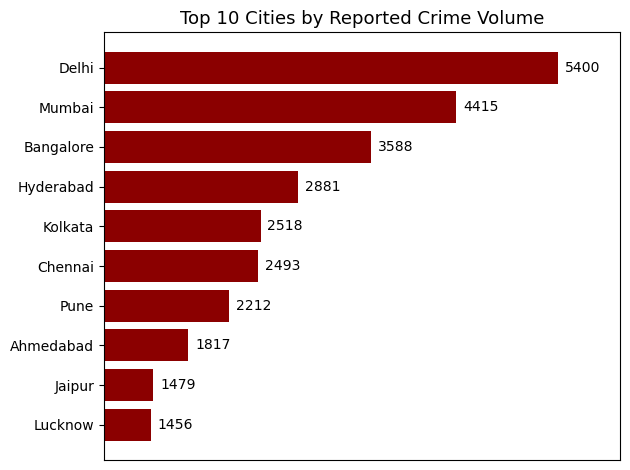

In [90]:
# 1. top 10 cities by crime
citytopn = df.groupby(by=['City']).agg({'Report Number' : 'count'}).sort_values(by='Report Number', ascending=False).head(10)
citytopn.sort_values(by='Report Number', ascending=False)
citytopn

bars = plt.barh(citytopn.index, citytopn['Report Number'], color = '#8B0000')
plt.title('Top 10 Cities by Reported Crime Volume', loc='center', fontdict={'size' : 13})

plt.bar_label(bars, labels=citytopn['Report Number'], label_type='edge', padding=5)


plt.gca().get_xaxis().set_visible(False)
plt.gca().invert_yaxis()
plt.xlim([1000,6000])
plt.tight_layout()

plt.show()


Insights :
- Delhi records the highest number of reported crimes, significantly outperforming other cities.
- Mumbai and Bangalore follow, indicating that metropolitan cities dominate crime volume.
- The top 3 cities contribute a disproportionately large share of total crimes, suggesting higher population density, urban stress, and reporting rates.


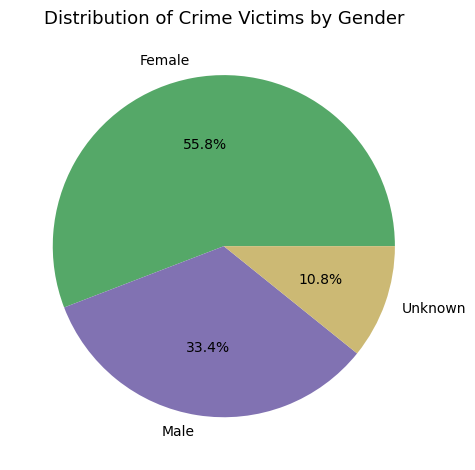

In [77]:
# 2. Gender distribution of victims

genderdist = df.groupby(by=['Victim Gender']).agg({'Report Number' : 'count'}).sort_values(by='Report Number', ascending=False).reset_index()
genderdist
colors = ['#55A868', '#8172B2', '#CCB974']

pie = plt.pie(genderdist['Report Number'], labels=genderdist['Victim Gender'], autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Crime Victims by Gender', fontdict={'size' : 13})
plt.tight_layout()
plt.show()



Insights :
- Female victims account for the majority (~55.8%) of reported cases.
- Male victims represent ~33.4% of cases.
- ~10.8% of records have unknown gender, indicating partial data gaps.

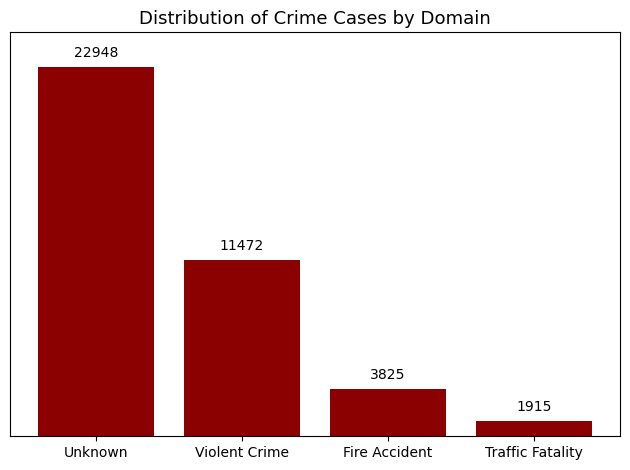

In [89]:
# 3. Crime Domain distribution

crimedomaindist = df.groupby(by=['Crime Domain']).agg({'Report Number' : 'count'}).sort_values(by='Report Number')
crimedomaindist

bar = plt.bar(crimedomaindist.index, height=crimedomaindist['Report Number'], color = '#8B0000')
plt.gca().get_yaxis().set_visible(False)
plt.bar_label(bar, labels=crimedomaindist['Report Number'], label_type='edge', padding=5)
plt.ylim([1000,25000])
plt.gca().invert_xaxis()
plt.title('Distribution of Crime Cases by Domain', fontdict={'size' : 13})
plt.tight_layout()

plt.show()


Insights :
- “Unknown” crime domain accounts for the largest share of cases (~22,948).
- Violent crimes are the most prominent clearly classified category (~11,472 cases).
- Fire accidents (~3,825) and traffic fatalities (~1,915) contribute a much smaller proportion of total incidents.

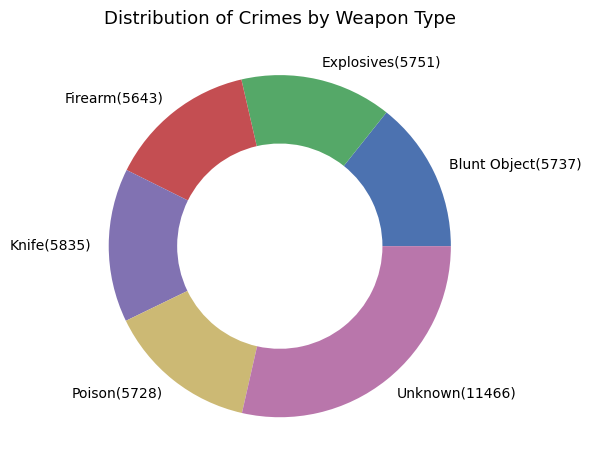

In [88]:
# 4. Weapon Used in Crime

weaponused = df.groupby(by=['Weapon Used'])['Report Number'].count().reset_index()
weaponused

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', "#B976AB"]
labels = (weaponused['Weapon Used']  + '(' + weaponused['Report Number'].astype(str) + ')')

plt.pie(weaponused['Report Number'], labels=labels, wedgeprops={'width' : 0.4}, colors=colors)
plt.title('Distribution of Crimes by Weapon Type', fontdict={'size' : 13})
plt.tight_layout()
plt.show()


Insights :
- A large number of crimes involve Unknown weapon or knives.
- Firearms are less frequent overall.
- The presence of weaponless crimes suggests that opportunistic and non-premeditated crimes form a significant share of incidents.

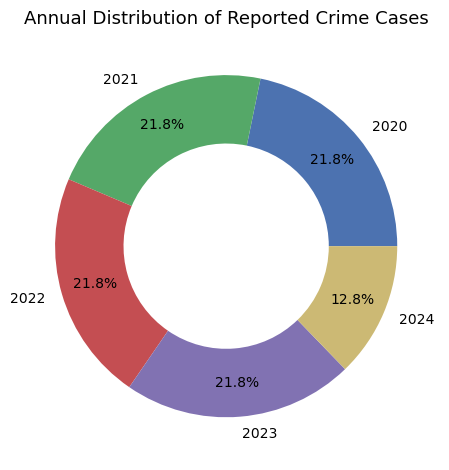

In [87]:
# 5. Crime cases per year

crimeXyear = df.groupby(by=df['Crime Year']).agg({'Report Number' : 'count'}).reset_index().rename(columns={'Report Number' : 'No. of Cases'})
crimeXyear

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

plt.pie(crimeXyear['No. of Cases'], labels=crimeXyear['Crime Year'], wedgeprops={'width' : 0.4}, autopct='%1.1f%%', pctdistance=0.8, colors=colors)
plt.title('Annual Distribution of Reported Crime Cases', fontdict={'size' : 13})
plt.tight_layout()
plt.show()

Insights :
- Crime distribution remains largely stable between 2020 and 2023, with each year contributing roughly ~21–22% of total cases.
- This indicates no extreme year-on-year volatility during this period.

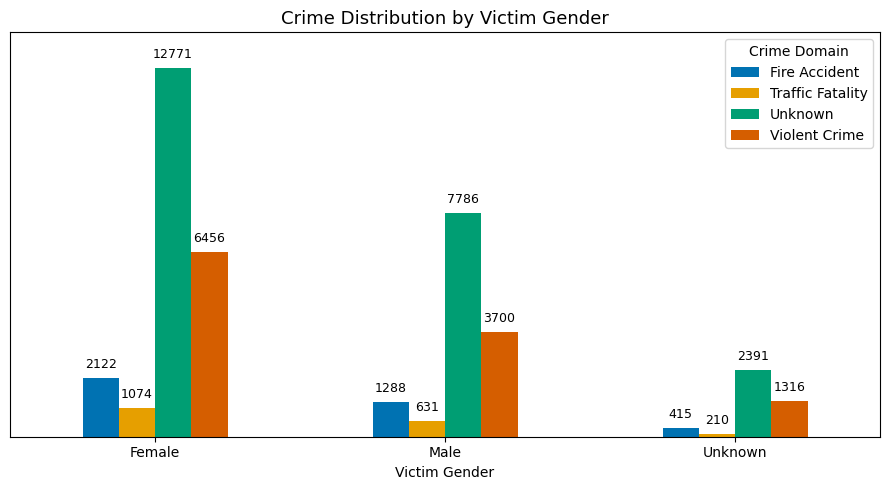

In [86]:
# 6. Victim Gender vs Crime Type

victimXgender = df.groupby(by=['Victim Gender', 'Crime Domain']).agg({'Report Number' : 'count'}).unstack()
victimXgender
victimXgender.columns = victimXgender.columns.droplevel(0)


ax = victimXgender.plot(kind='bar',figsize=(9,5),stacked=False, color = ['#0072B2', '#E69F00', '#009E73', '#D55E00'])

for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=5)


plt.gca().get_yaxis().set_visible(False)
plt.xlabel('Victim Gender')
plt.ylabel('Number of Cases')
plt.title('Crime Distribution by Victim Gender', fontdict={'size' : 13})
plt.legend(title='Crime Domain', loc='best')
plt.xticks(rotation=0)
plt.ylim([100,14000])
plt.tight_layout()
plt.show()



Insights :
- Female victims report the highest number of cases across all crime domains, particularly in Violent Crime and Unknown categories.
- Male victims consistently report fewer cases than females but follow a similar pattern across crime domains.
- The Unknown gender category contributes minimally, indicating relatively good data completeness.

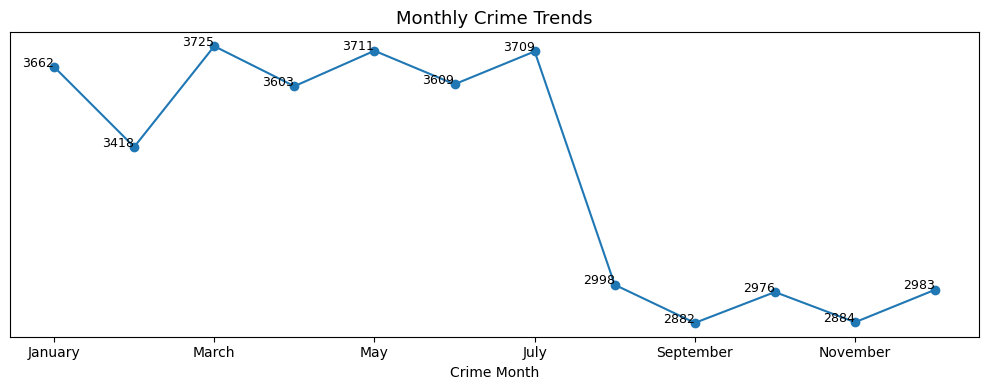

In [92]:
# 7. Crimes By Month

crimesXmonths = df.groupby(by=['Crime Month'])['Report Number'].count().reset_index()
crimesXmonths
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
crimesXmonths['Crime Month'] =pd.Categorical(crimesXmonths['Crime Month'],categories=month_order,ordered=True)
crimesXmonths = crimesXmonths.sort_values('Crime Month')

plt.figure(figsize=(10,4))
plt.plot(crimesXmonths['Crime Month'], crimesXmonths['Report Number'], marker='o')
plt.xlabel('Crime Month')
plt.title('Monthly Crime Trends', fontdict={'size' : 13})
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()


for i in range(len(crimesXmonths)):
    plt.text(crimesXmonths['Crime Month'][i],crimesXmonths['Report Number'][i] + 1,crimesXmonths['Report Number'][i],ha='right',fontsize=9)



plt.xticks(crimesXmonths['Crime Month'][::2])
plt.show()


Insights :
- Crime incidents remain consistently high during the first half of the year (January–July).
- A sharp decline is observed after July, reaching the lowest levels around September–November.
- This suggests a seasonal pattern in crime occurrences.

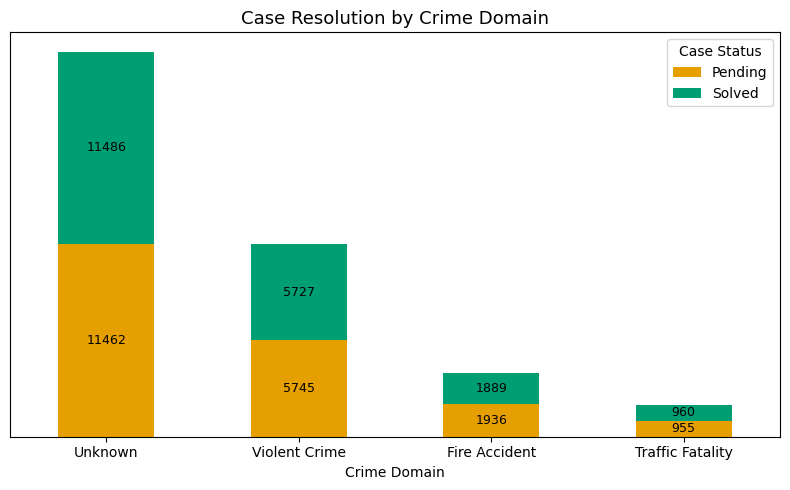

In [83]:
# 8. Pending vs Solved cases by crime domain

penXsol = df.groupby(by=['Case Status', 'Crime Domain' ])['Report Number'].count().reset_index().rename(columns={'Report Number' : 'No. of Cases'})
penXsol

pivot_df = penXsol.pivot(index='Crime Domain', columns='Case Status', values='No. of Cases')
pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))
pivot_df.plot(kind='bar', stacked=True, ax=ax, color = ['#E69F00', '#009E73'])
ax.set_title('Case Resolution by Crime Domain', fontdict={'size' : 13})
ax.set_xlabel('Crime Domain')
ax.legend(title='Case Status')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9)

plt.xticks(rotation=360, ha='center')
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()




Insights :
- Across all crime domains, a significant portion of cases remain pending, highlighting systemic delays in case resolution.
- The gap between pending and solved cases varies by crime type, indicating differences in investigation complexity and priority.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11344\3988983003.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupXcrime = df.groupby(by=['Age Group'])['Report Number'].count().reset_index().rename(columns={'Report Number' : 'No. of Cases'}).sort_values(by='No. of Cases', ascending=True)


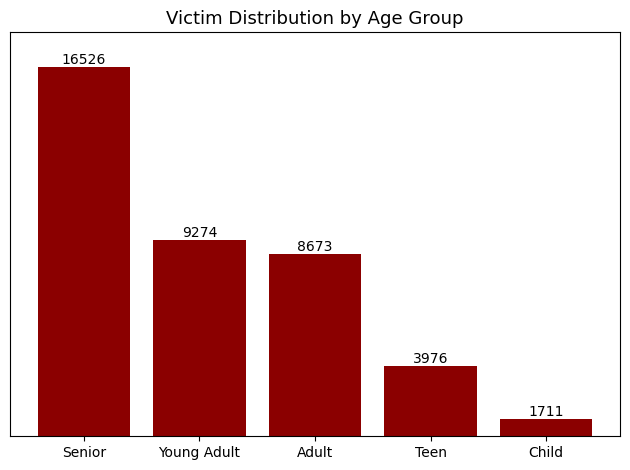

In [85]:
# 9. Victims by Agegroup

grupXcrime = df.groupby(by=['Age Group'])['Report Number'].count().reset_index().rename(columns={'Report Number' : 'No. of Cases'}).sort_values(by='No. of Cases', ascending=True)
grupXcrime

bars = plt.bar(grupXcrime['Age Group'], grupXcrime['No. of Cases'], color = '#8B0000')
plt.ylim([1000,18000])

plt.bar_label(bars, labels=grupXcrime['No. of Cases'], label_type='edge')
plt.title('Victim Distribution by Age Group', fontdict={'size' : 13})
plt.gca().get_yaxis().set_visible(False)
plt.gca().invert_xaxis()
plt.tight_layout()

plt.show()

Insights :
- Senior citizens represent the largest victim group, accounting for the highest number of reported cases.
- Crime impact is not evenly distributed across age groups, indicating varying vulnerability levels.

6. Limitations : 

- Analysis is based only on reported crimes
- Lack of geographic and socioeconomic variables
- No multi-year data to assess long-term trends


7. Key Insights & Conclusion :

- Crime incidents vary significantly by month, indicating seasonal trends
- Certain age groups and genders are disproportionately affected by specific crime types
- Case resolution rates differ across crime domains, highlighting operational gaps
- Findings can support targeted prevention strategies and resource allocation



In [93]:
df.to_csv("crime_data_cleaned.csv", index=False)
